# Prediction of Changing Jobs of Employee

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics

# Data Extraction

In [2]:
data_x_train = pd.read_csv('../input/hr-data-predict-change-jobscompetition-form/X_train.csv')
data_y_train = pd.read_csv('../input/hr-data-predict-change-jobscompetition-form/y_train.csv')

In [3]:
data_x_train.shape

(12452, 13)

In [4]:
data_y_train.shape

(12452, 2)

In [5]:
data_x_train.head()

enrollee_id      city  city_development_index gender  \
0        25298  city_138                   0.836   Male   
1         4241  city_160                   0.920   Male   
2        24086   city_57                   0.866   Male   
3        26773   city_16                   0.910   Male   
4        32325  city_143                   0.740    NaN   

       relevent_experience enrolled_university education_level  \
0   No relevent experience    Full time course     High School   
1   No relevent experience    Full time course     High School   
2   No relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4   No relevent experience    Full time course        Graduate   

  major_discipline experience company_size company_type last_new_job  \
0              NaN          5      100-500      Pvt Ltd            1   
1              NaN          5          NaN          NaN            1   
2             STEM         10          NaN          NaN            1   
3             STEM        >20        50-99      Pvt Ltd           >4   
4             STEM          5          NaN          NaN        never   

   training_hours  
0              45  
1              17  
2              50  
3             135  
4              17

In [6]:
data_y_train.head()

enrollee_id  target
0        25298     0.0
1         4241     1.0
2        24086     0.0
3        26773     0.0
4        32325     1.0

In [7]:
#union of data
join = (data_x_train, data_y_train['target'])
df = pd.concat(join, axis = True)
df.head()

enrollee_id      city  city_development_index gender  \
0        25298  city_138                   0.836   Male   
1         4241  city_160                   0.920   Male   
2        24086   city_57                   0.866   Male   
3        26773   city_16                   0.910   Male   
4        32325  city_143                   0.740    NaN   

       relevent_experience enrolled_university education_level  \
0   No relevent experience    Full time course     High School   
1   No relevent experience    Full time course     High School   
2   No relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4   No relevent experience    Full time course        Graduate   

  major_discipline experience company_size company_type last_new_job  \
0              NaN          5      100-500      Pvt Ltd            1   
1              NaN          5          NaN          NaN            1   
2             STEM         10          NaN          NaN            1   
3             STEM        >20        50-99      Pvt Ltd           >4   
4             STEM          5          NaN          NaN        never   

   training_hours  target  
0              45     0.0  
1              17     1.0  
2              50     0.0  
3             135     0.0  
4              17     1.0

In [8]:
#transform target
df['target'] = df['target'].astype('int')

In [9]:
#indexing enrollee ID
df = df.set_index('enrollee_id')
df.head()

city  city_development_index gender      relevent_experience  \
enrollee_id                                                                     
25298        city_138                   0.836   Male   No relevent experience   
4241         city_160                   0.920   Male   No relevent experience   
24086         city_57                   0.866   Male   No relevent experience   
26773         city_16                   0.910   Male  Has relevent experience   
32325        city_143                   0.740    NaN   No relevent experience   

            enrolled_university education_level major_discipline experience  \
enrollee_id                                                                   
25298          Full time course     High School              NaN          5   
4241           Full time course     High School              NaN          5   
24086             no_enrollment        Graduate             STEM         10   
26773             no_enrollment        Graduate             STEM        >20   
32325          Full time course        Graduate             STEM          5   

            company_size company_type last_new_job  training_hours  target  
enrollee_id                                                                 
25298            100-500      Pvt Ltd            1              45       0  
4241                 NaN          NaN            1              17       1  
24086                NaN          NaN            1              50       0  
26773              50-99      Pvt Ltd           >4             135       0  
32325                NaN          NaN        never              17       1

In [10]:
df.describe()

city_development_index  training_hours        target
count            12452.000000    12452.000000  12452.000000
mean                 0.829709       65.604481      0.249358
std                  0.123087       60.430340      0.432659
min                  0.448000        1.000000      0.000000
25%                  0.740000       23.000000      0.000000
50%                  0.910000       47.000000      0.000000
75%                  0.920000       88.000000      0.000000
max                  0.949000      336.000000      1.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12452 entries, 25298 to 31875
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    12452 non-null  object 
 1   city_development_index  12452 non-null  float64
 2   gender                  9535 non-null   object 
 3   relevent_experience     12452 non-null  object 
 4   enrolled_university     12195 non-null  object 
 5   education_level         12137 non-null  object 
 6   major_discipline        10586 non-null  object 
 7   experience              12415 non-null  object 
 8   company_size            8600 non-null   object 
 9   company_type            8471 non-null   object 
 10  last_new_job            12179 non-null  object 
 11  training_hours          12452 non-null  int64  
 12  target                  12452 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.3+ MB


In [12]:
#handling missing value
df.dropna(inplace = True)

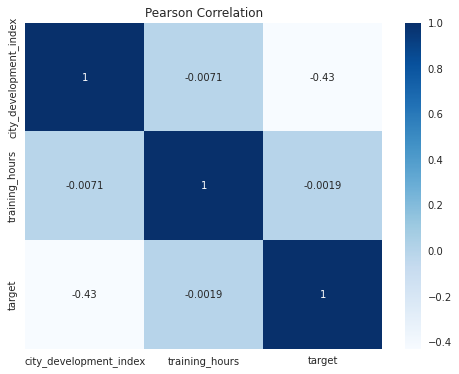

In [13]:
#heatmap correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.title("Pearson Correlation")
plt.show()

# Visualization

In [14]:
#visualize gender of employee
plt.figure(figsize = (8,6))
sns.countplot(df['gender'])
plt.title("Gender of Employee")
plt.xlabel("Gender")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [15]:
#visualize gender of employee ~ training hours
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'gender', y = 'training_hours', palette = 'Set1')
plt.title("Gender of Employee ~ Training Hours")
plt.xlabel("Gender")
plt.ylabel("Training Hours")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


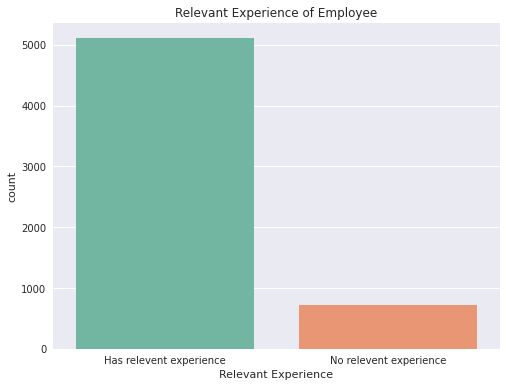

In [16]:
#visualize relevant experience of employee
plt.figure(figsize = (8,6))
sns.countplot(df['relevent_experience'], palette = 'Set2')
plt.title("Relevant Experience of Employee")
plt.xlabel("Relevant Experience")
plt.show()

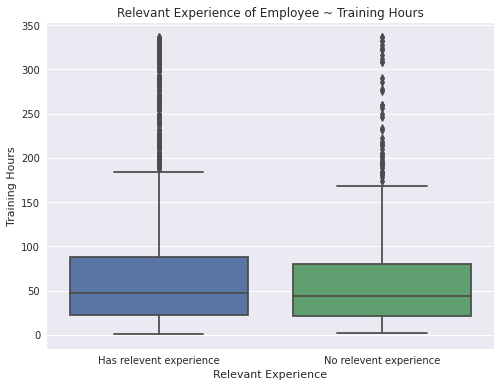

In [17]:
#visualize relevant experience of employee ~ training hours
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'relevent_experience', y = 'training_hours')
plt.title("Relevant Experience of Employee ~ Training Hours")
plt.xlabel("Relevant Experience")
plt.ylabel("Training Hours")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


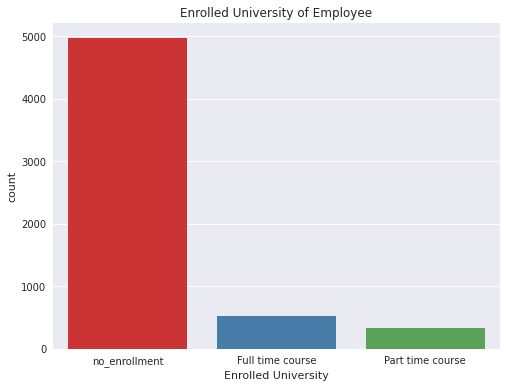

In [18]:
#visualize enrolled university of employee
plt.figure(figsize = (8,6))
sns.countplot(df['enrolled_university'], palette = 'Set1')
plt.title("Enrolled University of Employee")
plt.xlabel("Enrolled University")
plt.show()

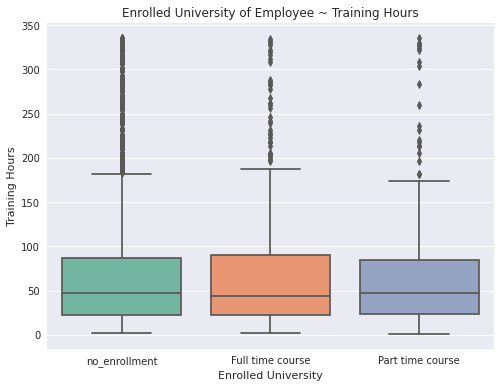

In [19]:
#visualize enrolled university of employee ~ training hours
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'enrolled_university', y = 'training_hours', palette = 'Set2')
plt.title("Enrolled University of Employee ~ Training Hours")
plt.xlabel("Enrolled University")
plt.ylabel("Training Hours")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


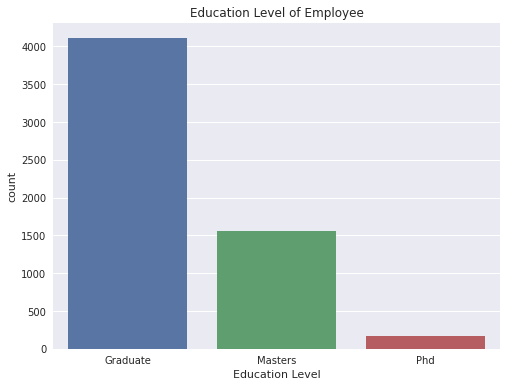

In [20]:
#visualize education level of employee
plt.figure(figsize = (8,6))
sns.countplot(df['education_level'])
plt.title("Education Level of Employee")
plt.xlabel("Education Level")
plt.show()

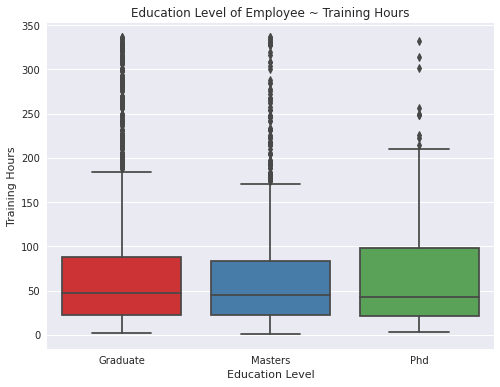

In [21]:
#visualize education level of employee ~ training hours
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'education_level', y = 'training_hours', palette = 'Set1')
plt.title("Education Level of Employee ~ Training Hours")
plt.xlabel("Education Level")
plt.ylabel("Training Hours")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


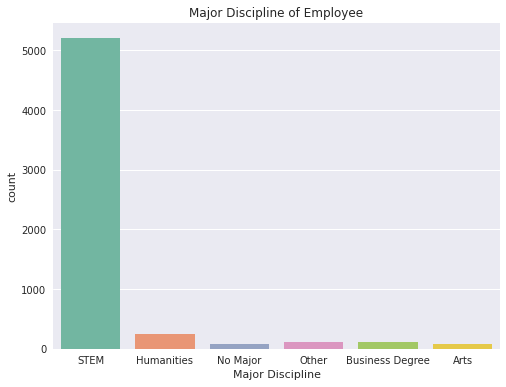

In [22]:
#visualize major discipline of employee
plt.figure(figsize = (8,6))
sns.countplot(df['major_discipline'], palette = 'Set2')
plt.title("Major Discipline of Employee")
plt.xlabel("Major Discipline")
plt.show()

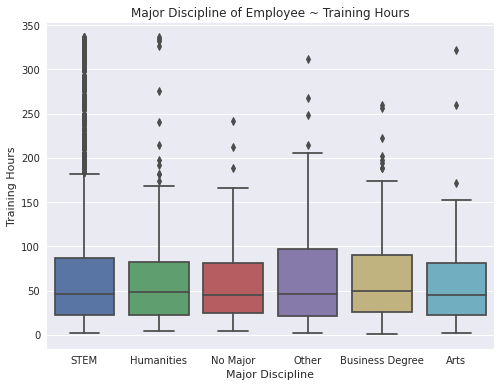

In [23]:
#visualize major discipline of employee ~ training hours
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'major_discipline', y = 'training_hours')
plt.title("Major Discipline of Employee ~ Training Hours")
plt.xlabel("Major Discipline")
plt.ylabel("Training Hours")
plt.show()

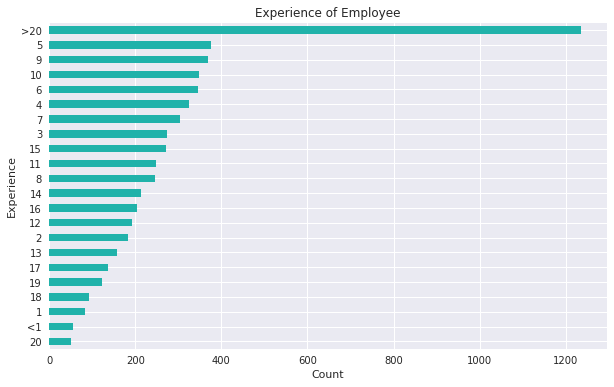

In [24]:
#visualize experience of employee
plt.figure(figsize = (10,6))
df['experience'].value_counts().sort_values().plot(kind = 'barh', color = 'lightseagreen')
plt.title("Experience of Employee")
plt.xlabel("Count")
plt.ylabel("Experience")
plt.show()

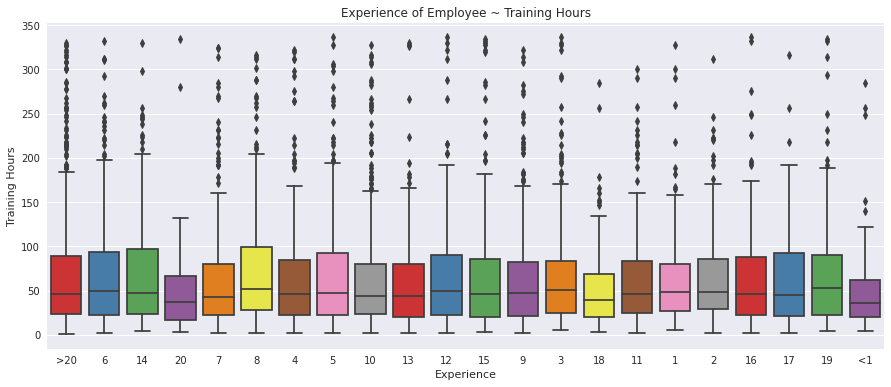

In [25]:
#visualize experience of employee ~ training hours
plt.figure(figsize = (15,6))
sns.boxplot(data = df, x = 'experience', y = 'training_hours', palette = 'Set1')
plt.title("Experience of Employee ~ Training Hours")
plt.xlabel("Experience")
plt.ylabel("Training Hours")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


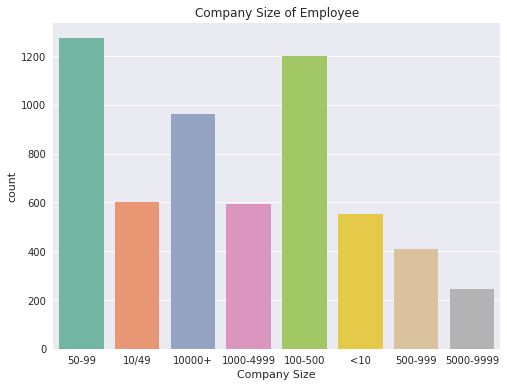

In [26]:
#visualize company size of employee
plt.figure(figsize = (8,6))
sns.countplot(df['company_size'], palette = 'Set2')
plt.title("Company Size of Employee")
plt.xlabel("Company Size")
plt.show()

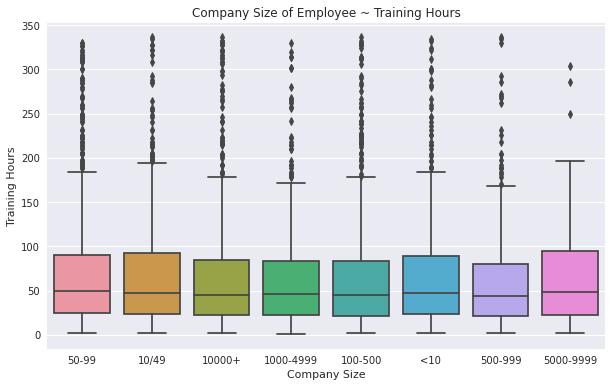

In [27]:
#visualize company size of employee ~ training hours
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'company_size', y = 'training_hours')
plt.title("Company Size of Employee ~ Training Hours")
plt.xlabel("Company Size")
plt.ylabel("Training Hours")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


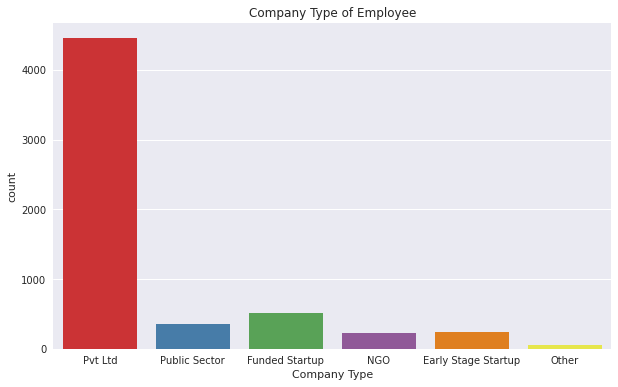

In [28]:
#visualize company type of employee
plt.figure(figsize = (10,6))
sns.countplot(df['company_type'], palette = 'Set1')
plt.title("Company Type of Employee")
plt.xlabel("Company Type")
plt.show()

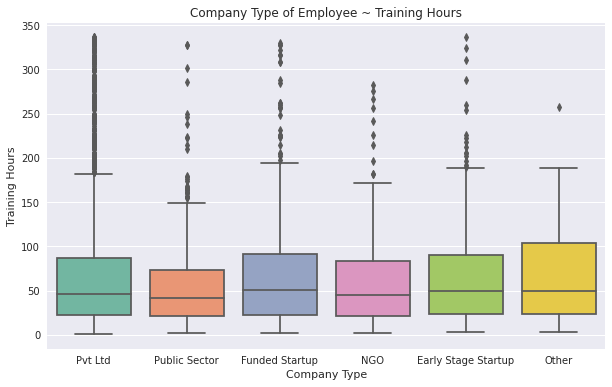

In [29]:
#visualize company type of employee ~ training hours
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'company_type', y = 'training_hours', palette = 'Set2')
plt.title("Company Type of Employee ~ Training Hours")
plt.xlabel("Company Type")
plt.ylabel("Training Hours")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


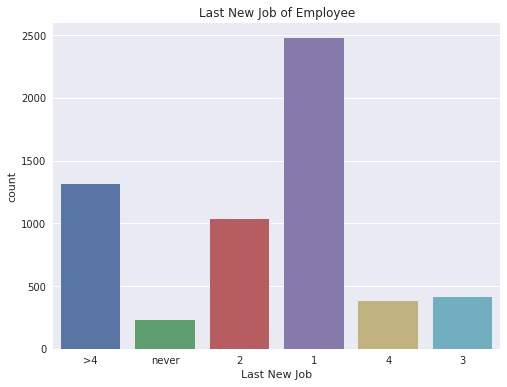

In [30]:
#visualize last new job of employee
plt.figure(figsize = (8,6))
sns.countplot(df['last_new_job'])
plt.title("Last New Job of Employee")
plt.xlabel("Last New Job")
plt.show()

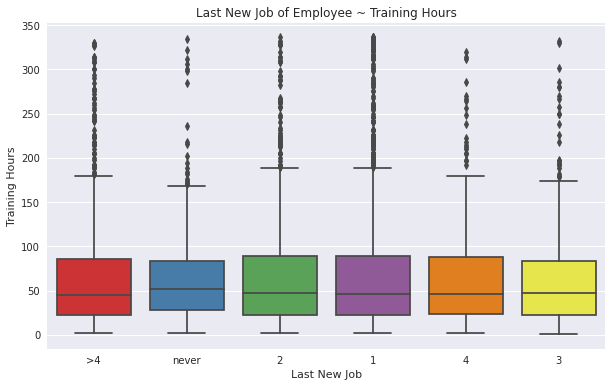

In [31]:
#visualize last new job of employee ~ training hours
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'last_new_job', y = 'training_hours', palette = 'Set1')
plt.title("Last New Job of Employee ~ Training Hours")
plt.xlabel("Last New Job")
plt.ylabel("Training Hours")
plt.show()

# Classification Model

In [32]:
#handling categorical data
for i in df.columns.tolist():
    df[i] = df[i].astype('category').cat.codes

df.head()

city  city_development_index  gender  relevent_experience  \
enrollee_id                                                              
26773          43                      77       1                    0   
11103           7                      49       1                    0   
14682          26                      73       1                    0   
24199          43                      77       1                    1   
29416           5                      80       1                    0   

             enrolled_university  education_level  major_discipline  \
enrollee_id                                                           
26773                          2                0                 5   
11103                          0                0                 5   
14682                          2                1                 5   
24199                          2                0                 5   
29416                          2                1                 5   

             experience  company_size  company_type  last_new_job  \
enrollee_id                                                         
26773                21             4             5             4   
11103                16             0             5             5   
14682                 5             3             5             4   
24199                12             2             5             1   
29416                21             4             5             0   

             training_hours  target  
enrollee_id                          
26773                   132       0  
11103                    61       0  
14682                    15       0  
24199                    13       0  
29416                    27       0

In [33]:
#split data
X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4084, 12)
(4084,)
(1751, 12)
(1751,)


In [34]:
#prepare models
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    LinearSVC(),
    DecisionTreeClassifier(criterion = 'gini', max_depth = 3),
    RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1),
    XGBClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [35]:
#report models
log_cols = ["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 84.4660%
Log Loss: 5.365291570510488




/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearSVC
****Results****
Accuracy: 54.3689%
Log Loss: 15.760738579154077


DecisionTreeClassifier
****Results****
Accuracy: 85.8367%
Log Loss: 4.8918929192776535




[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomForestClassifier
****Results****
Accuracy: 85.5511%
Log Loss: 4.99051101683233


[03:55:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Accuracy: 84.8087%
Log Loss: 5.246946017569139


AdaBoostClassifier
****Results****
Accuracy: 86.1793%
Log Loss: 4.773539603254458


GaussianNB
****Results****
Accuracy: 81.4392%
Log Loss: 6.410776838267455


LinearDiscriminantAnalysis
****Results****
Accuracy: 84.7516%
Log Loss: 5.266686715860137


QuadraticDiscriminantAnalysis
****Results****
Accuracy: 81.7818%
Log Loss: 6.2924221522886405




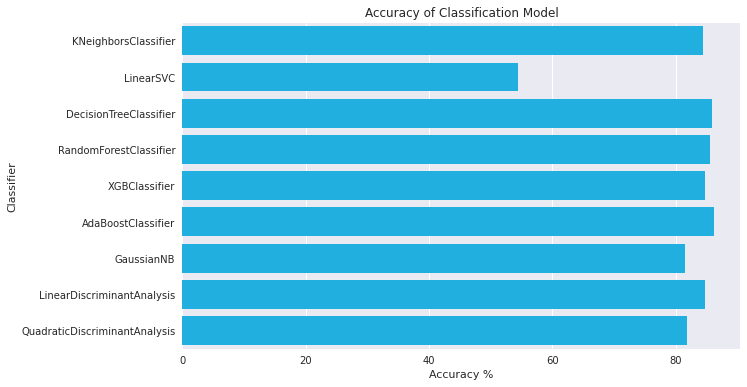

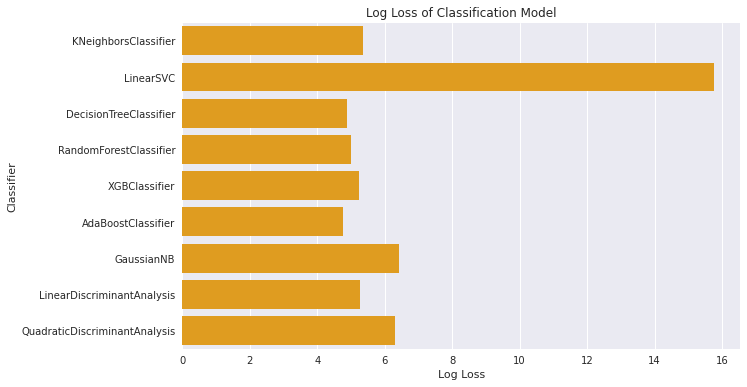

In [36]:
#visualize accuracy models
plt.figure(figsize = (10,6))
sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "deepskyblue")
plt.xlabel('Accuracy %')
plt.title('Accuracy of Classification Model')
plt.show()

#visualize log loss models
plt.figure(figsize = (10,6))
sns.barplot(x = 'Log Loss', y = 'Classifier', data = log, color = "orange")
plt.xlabel('Log Loss')
plt.title('Log Loss of Classification Model')
plt.show()

## Adaptive Boosting Model is the best accuracy score result on 86%

In [37]:
#build model
ab = AdaBoostClassifier()
%time ab.fit(X_train, y_train)
ab.score(X_test, y_test)

CPU times: user 186 ms, sys: 0 ns, total: 186 ms
Wall time: 187 ms


0.8617932609937179

In [38]:
#prediction
y_pred = ab.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [39]:
#check of MSE & RMSE 
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.13820673900628214
Root Mean Squared Error : 0.3717616696302648


[[1382  105]
 [ 137  127]]


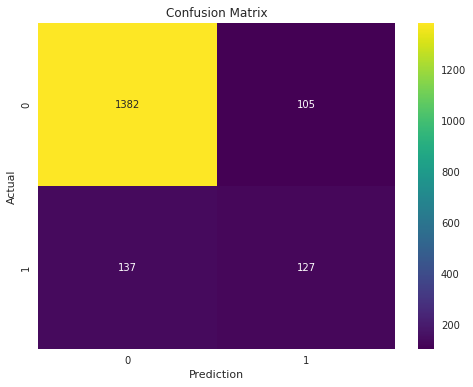

In [40]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = '.0f', cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [41]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1487
           1       0.55      0.48      0.51       264

    accuracy                           0.86      1751
   macro avg       0.73      0.71      0.72      1751
weighted avg       0.86      0.86      0.86      1751



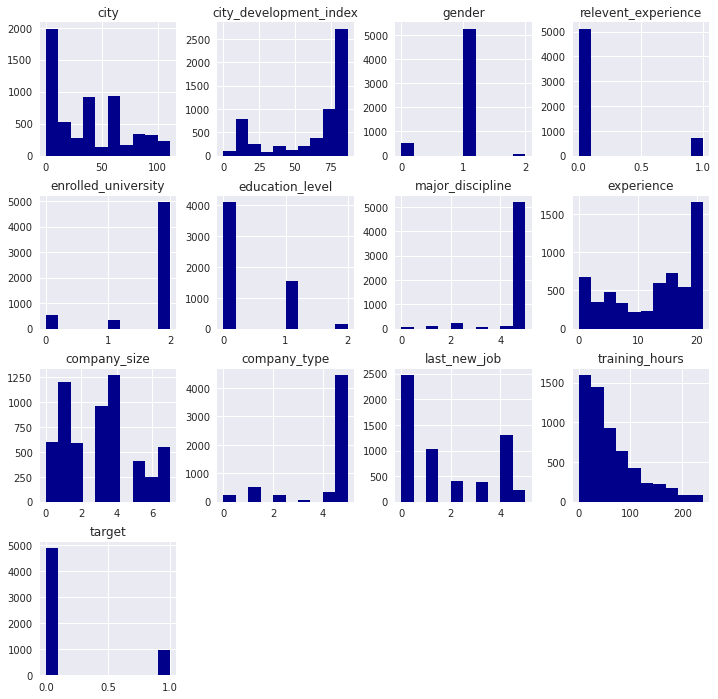

In [42]:
#visualize histogram of each attribute
df.hist(figsize = (12,12), color = 'darkblue')
plt.show()